In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, IndexLocator
import numpy as np
import calplot

In [2]:
df = pd.read_csv("data/2024_schedule.csv")
df

,date,time,home,away
0,2024-03-16,13:00:00,KCC,POR
1,2024-03-16,16:00:00,LOU,ORL
2,2024-03-16,19:00:00,NC,HOU
3,2024-03-16,19:30:00,UTA,CHI
4,2024-03-16,22:00:00,LA,BFC
...,...,...,...,...
177,2024-11-02,17:00:00,ORL,RGN
178,2024-11-02,19:30:00,NC,WAS
179,2024-11-02,21:30:00,HOU,BFC
180,2024-11-03,15:15:00,CHI,KCC


In [3]:
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

# Get day of week
df["day_of_week"] = (df["date"].dt.dayofweek + 1) % 7

# Get hour of day
df["hour_of_day"] = df["time"].dt.hour

# Add empty column
df["empty"] = 1
df

<ipython-input-3-79133b2c4aba>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


,date,time,home,away,day_of_week,hour_of_day,empty
0,2024-03-16,2024-01-24 13:00:00,KCC,POR,6,13,1
1,2024-03-16,2024-01-24 16:00:00,LOU,ORL,6,16,1
2,2024-03-16,2024-01-24 19:00:00,NC,HOU,6,19,1
3,2024-03-16,2024-01-24 19:30:00,UTA,CHI,6,19,1
4,2024-03-16,2024-01-24 22:00:00,LA,BFC,6,22,1
...,...,...,...,...,...,...,...
177,2024-11-02,2024-01-24 17:00:00,ORL,RGN,6,17,1
178,2024-11-02,2024-01-24 19:30:00,NC,WAS,6,19,1
179,2024-11-02,2024-01-24 21:30:00,HOU,BFC,6,21,1
180,2024-11-03,2024-01-24 15:15:00,CHI,KCC,0,15,1


# Week of year

<Figure size 432x288 with 0 Axes>

<Figure size 12000x600 with 0 Axes>

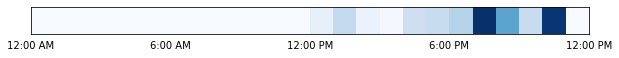

In [4]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 0.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Creating plot
plt.hist2d(
    df["hour_of_day"],
    df["empty"],
    cmap=plt.get_cmap("Blues"),
    range=[[0, 24], [0, 1]],
    bins=[24, 1],
)

# Ticks
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
hours = ["12:00 AM", "6:00 AM", "12:00 PM", "6:00 PM", "12:00 PM"]
ax.xaxis.set_major_formatter(FuncFormatter(lambda self, i: hours[i]))
ax.set_xticks([0, 6, 12, 18, 24])

# Show plot
plt.show()

# Day of week

In [5]:
df_date = df.groupby("day_of_week").agg(count=("empty", "count")).reset_index()
print(df_date)
(48+76)/(48+20+1+23+76)

   day_of_week  count
0            0     51
1            1      2
2            3      8
3            4      1
4            5     42
5            6     78


0.7380952380952381

<Figure size 432x288 with 0 Axes>

<Figure size 9600x6000 with 0 Axes>

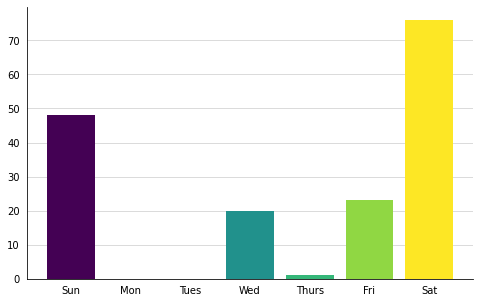

In [4]:

plt.clf()
plt.rcParams["figure.figsize"] = (8, 5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: y/6

# Plot data
plt.bar(df_date["day_of_week"], df_date["count"], color=my_cmap(rescale(df_date["day_of_week"])))

# Axes and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="lightgray")

# X tick labels
days = ["", "Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"]
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda self, i: days[i] if i >= 0 and i < len(days) else "")
)

# Heatmap

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


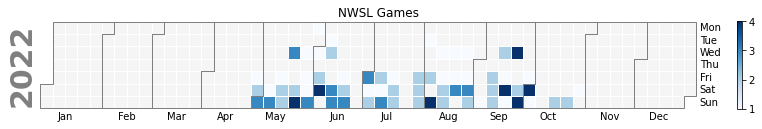

In [27]:
df.set_index("date", inplace=True)
pl1 = calplot.calplot(
    data=df["home"],
    how="count",
    cmap="Blues",
    suptitle="NWSL Games",
    colorbar=True
)